In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from dragsUtility import * 
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dragsUtility= DragsUtility()

In [3]:
def getEpisodeRank(episode):
    df = pd.read_csv(f'Data/SingleEpisodes/rutweetE{episode}.csv')
    graph = nx.from_pandas_edgelist(df, source="source", target="target", edge_attr="weight", create_using=nx.DiGraph)
    graph.remove_edges_from(nx.selfloop_edges(graph))
    sources = list(filter(lambda x: dragsUtility.isaDrag(str(x)),list(graph.nodes)))
    harmonic = nx.harmonic_centrality(graph, nbunch=sources)
    harmonic2 = list(harmonic.items())
    contestant_harmonic = [ (dragsUtility.getInfoAboutQueenByID(str(k))["Name"], v) for (k,v) in harmonic2]
    contestant_harmonic = list(sorted( contestant_harmonic, key=lambda x: x[1], reverse=True))
    episode_rank = pd.DataFrame(contestant_harmonic, columns = ["contestant", "harmonic_centrality"])
    return episode_rank

In [4]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [5]:
final = pd.read_csv('Data/harmonic_final.csv')

In [6]:
e09 = getEpisodeRank("09")
e10 = getEpisodeRank("10")
e11 = getEpisodeRank("11")
e12 = getEpisodeRank("12")
e13 = getEpisodeRank("13")

display_side_by_side([e09,e10, e11, e12,  e13, final ], ['Episode 9', 'Episode 10', 'Episode 11', 'Episode 12', 'Episode 13', "Final"])

,contestant,harmonic_centrality
0,Symone,852.267
1,Denali Foxx,802.5
2,Gottmik,712.2
3,Kandy Muse,635.983
4,Rosé,620.383
5,Utica Queen,572.717
6,Olivia Lux,466.226
7,LaLa Ri,379.126
8,Elliott with 2 Ts,33.3667
9,Kahmora Hall-Iman,13


In [7]:
todf=[]
for drag in dragsUtility.getRealRanking():
    todf.append( (drag, [(e09[e09['contestant']==drag].index[0]) if (drag in list(e09.contestant.values)) else "",\
                  (e10[e10['contestant']==drag].index[0]) if (drag in list(e10.contestant.values)) else "",\
                  (e11[e11['contestant']==drag].index[0]) if (drag in list(e11.contestant.values)) else "",\
                  (e12[e12['contestant']==drag].index[0]) if (drag in list(e12.contestant.values)) else "",\
                  (e13[e13['contestant']==drag].index[0]) if (drag in list(e13.contestant.values)) else "","","",\
                  final[final['contestant']==drag].index[0]]))
todf

[('Symone', [0, 1, 5, 4, 1, '', '', 0]),
 ('Kandy Muse', [3, 2, 0, 0, 2, '', '', 1]),
 ('Gottmik', [2, 4, 3, 3, 0, '', '', 4]),
 ('Rosé', [4, 3, 4, 1, 4, '', '', 3]),
 ('Olivia Lux', [6, 7, 7, 7, 3, '', '', 8]),
 ('Utica Queen', [5, 5, 2, 2, 7, '', '', 5]),
 ('Tina Burner', [10, 6, 6, 5, 5, '', '', 7]),
 ('Denali Foxx', [1, 0, 1, 6, 8, '', '', 2]),
 ('Elliott with 2 Ts', [8, 12, 9, '', '', '', '', 12]),
 ('LaLa Ri', [7, 11, '', 8, 6, '', '', 6]),
 ('Tamisha Iman', [12, 10, '', 11, 11, '', '', 11]),
 ('Joey Jay', [11, 9, 8, 10, 9, '', '', 10]),
 ('Kahmora Hall-Iman', [9, 8, '', 9, 10, '', '', 9])]

In [8]:
todf=[]
for drag in dragsUtility.getRealRanking():
    todf.append( (drag, (e09[e09['contestant']==drag].index[0]+1) if (drag in list(e09.contestant.values)) else "", "Episode 9"))
    todf.append( (drag, (e10[e10['contestant']==drag].index[0]+1) if (drag in list(e10.contestant.values)) else "", "Episode 10"))
    todf.append( (drag, (e11[e11['contestant']==drag].index[0]+1) if (drag in list(e11.contestant.values)) else "", "Episode 11"))
    todf.append( (drag, (e12[e12['contestant']==drag].index[0]+1) if (drag in list(e12.contestant.values)) else "", "Episode 12"))
    todf.append( (drag, (e13[e13['contestant']==drag].index[0]+1) if (drag in list(e13.contestant.values)) else "", "Episode 13"))
    todf.append( (drag,  "" , "Episode 14"))
    todf.append( (drag,  "" , "Episode 15"))
    todf.append( (drag, (final[final['contestant']==drag].index[0]+1) if (drag in list(final.contestant.values)) else "", "Final"))

In [9]:
dataset = sns.load_dataset("tips")
dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


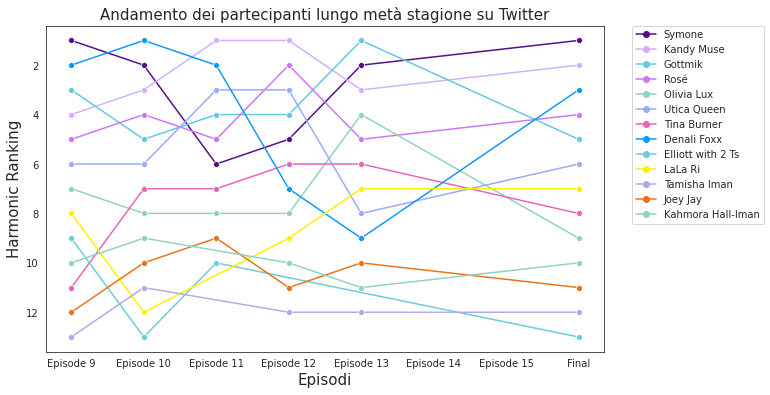

In [10]:
sns.set_style("white")
dataset = pd.DataFrame(todf, columns=["Contestant", 'Rank', 'Episode'])
dataset = dataset.replace("", np.nan)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

colors = ["#540E8B", "#d2b0ff", "#61CAE2", "#CA78f8", "#91D2BE", "#99aaff", "#EA63BD", "#1098f7", "#6ACED7","#fff000", "#B4A7EB", "#ea7317", "#91D2BE" ]
sns.set_palette(sns.color_palette(colors))

bobo = sns.lineplot(x='Episode',y='Rank',  hue = 'Contestant', data=dataset, style ='Contestant', ci= None, dashes= False, markers= ["o","o","o","o","o","o","o","o","o","o","o","o","o"])
plt.xlabel("Episodi", fontsize= 15)
plt.ylabel("Harmonic Ranking", fontsize= 15)
plt.title("Andamento dei partecipanti lungo metà stagione su Twitter", fontsize= 15)
plt.ylim(reversed(plt.ylim()))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("Images/ContestantTrends.png", dpi=1200, bbox_inches='tight')
plt.show()


# LipSync

In [11]:
import dateutil.parser
import pytz


In [12]:
def getHourAndMinutesFromISO8601date(iso):
    date = dateutil.parser.parse(iso)
    fmt = '%Y-%m-%d %H:%M:%S %Z%z'
    est = pytz.timezone('US/Eastern')
    estdate = dateutil.parser.parse(date.astimezone(est).strftime(fmt))
    return (estdate.hour, estdate.minute)

In [15]:
def getTopMentionsOfLipSyncOfOneEpisode(episode, bottom, eliminated):
    f = open(f"Data/SingleEpisodes/rutweetE{episode}.json")
    ep = json.load(f)
    lipsync_tweets= []
    for tweet in ep:
        date = tweet['data']['created_at']
        time = getHourAndMinutesFromISO8601date(date)
        if episode == "11":
            if time[0] == 20 and (int(time[1]) >= 20 and int(time[1])<=30):
                lipsync_tweets.append(tweet)
        else:
            if time[0] == 21 and (int(time[1]) >= 20 and int(time[1])<=30):
                lipsync_tweets.append(tweet)
    mentions = {}
    twitterids = [ dragsUtility.getInfoAboutQueenByName(drag)['Twitter_handler'] for drag in dragsUtility.getRealRanking()]

    for drag in twitterids:
        mentions[drag]=0

    for tweet in lipsync_tweets:
        for rule in tweet['matching_rules']:
            if rule['tag'][1:] in twitterids:
                mentions[rule['tag'][1:]] = mentions[rule['tag'][1:]] + 1
    
    for key, value in mentions.items():
        if key == bottom:
             mentions[key + "❌"] = mentions.pop(key)
        elif key == eliminated:
             mentions[key + "❌"] = mentions.pop(key)

    mentions_list=[ (k,v) for (k,v) in mentions.items()]
    mentions_list = list(sorted( mentions_list, key=lambda x: x[1], reverse=True))
    df = pd.DataFrame(mentions_list[:2], columns = ["contestant", "mentions"])
    return df

In [16]:
e10 = getTopMentionsOfLipSyncOfOneEpisode("10", "TheKandyMuse", "denalifox")
e11 = getTopMentionsOfLipSyncOfOneEpisode("11", "QueenUtica", "TheTinaBurner")
e12 = getTopMentionsOfLipSyncOfOneEpisode("12", "the_symonee", "QueenUtica")
e13 = getTopMentionsOfLipSyncOfOneEpisode("13", "TheKandyMuse", "TheOliviaLux")

display_side_by_side([e10, e11, e12,  e13], ['Episode 10', 'Episode 11', 'Episode 12', 'Episode 13'])

,contestant,mentions
0,TheKandyMuse❌,409
1,the_symonee,335
,contestant,mentions
0,TheKandyMuse,119
1,gottmik,29
,contestant,mentions
0,TheKandyMuse,334
1,QueenUtica❌,174
,contestant,mentions
0,gottmik,166


In [17]:
episode="16"
df = pd.read_csv(f'Data/SingleEpisodes/rutweetE{episode}.csv')
graph = nx.from_pandas_edgelist(df, source="source", target="target", edge_attr="weight", create_using=nx.DiGraph)
graph.remove_edges_from(nx.selfloop_edges(graph))
print(f"Episodio {episode}, number of nodes {graph.order()}")
print(f"Episodio {episode}, of edges {graph.size()}")

Episodio 16, number of nodes 14661
Episodio 16, of edges 25516
